In [8]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [18, 9]
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)


In [2]:
polygon = '51.5087,-3.2419:51.5112,-3.2396:51.5047,-3.2129:51.5047,-3.1835:51.4986,-3.1842:51.4948,-3.1930:51.4981,-3.2225:51.5009,-3.2298:51.5087,-3.2419'
start_year = 2016
end_year = 2018
start_month = 1
end_month = 12


In [3]:
for i in range (start_year,end_year):
    for j in range (start_month,end_month):
        year = str(i)
        month = '0' + str(j) if len(str(j)) == 1 else str(j)
        date = year + '-' + month
        url = 'https://data.police.uk/api/crimes-street/all-crime?poly=' + polygon + '&date=' + date
        data = requests.get(url).json()
        if i == start_year and j == start_month:
            df = pd.io.json.json_normalize(data)
        else:
            df2 = pd.io.json.json_normalize(data)
            df = df.append(df2)
df

,category,context,id,location.latitude,location.longitude,location.street.id,location.street.name,location_subtype,location_type,month,outcome_status,outcome_status.category,outcome_status.date,persistent_id
0,anti-social-behaviour,,46324099,51.501674,-3.205263,1082889,On or near Western Avenue,,Force,2016-01,NaN,NaN,NaN,45a29056b24d650b5dae8801d7e6abccf1498c5c87d267...
1,anti-social-behaviour,,46324743,51.502279,-3.199747,1082902,On or near Llantarnam Road,,Force,2016-01,NaN,NaN,NaN,78247bac7cc1e92ad93185d51e8db7503585692c63d9c5...
2,anti-social-behaviour,,46321460,51.505533,-3.228577,1082670,On or near Station Road,,Force,2016-01,NaN,NaN,NaN,02815dcef1d902644ecb7f359a3657687a771e5799180e...
3,anti-social-behaviour,,46321050,51.502152,-3.212148,1082878,On or near Waterston Road,,Force,2016-01,NaN,NaN,NaN,c80af657a689b41216c54a26ab0a48e79c4f765eec5a55...
4,anti-social-behaviour,,46321620,51.497860,-3.194027,1081701,On or near Cross Place,,Force,2016-01,NaN,NaN,NaN,48c74af183a357ae83eb47c60c85c993808e2c0b400a1e...
5,anti-social-behaviour,,46327551,51.499777,-3.211394,1081707,On or near Lydstep Crescent,,Force,2016-01,NaN,NaN,NaN,aef82ebdad9577be86d7a3f7925cbaa9ed3e246f410c01...
6,anti-social-behaviour,,46327975,51.500988,-3.203790,1082904,On or near Clos Menter,,Force,2016-01,NaN,NaN,NaN,2b6e2d1db69374a02f606d0596082cb6ef2bda477622b6...
7,anti-social-behaviour,,46322925,51.499777,-3.211394,1081707,On or near Lydstep Crescent,,Force,2016-01,NaN,NaN,NaN,e24068f269cf49c60803abe1b69c68c97a37cfba35ccd8...
8,anti-social-behaviour,,46322680,51.498733,-3.210559,1081708,On or near Llanmorlais Road,,Force,2016-01,NaN,NaN,NaN,0d10900fdf4557f039ec55dbdc86bf75f53251ddecbb96...
9,anti-social-behaviour,,46323102,51.498579,-3.184249,1081597,On or near Whitchurch Road,,Force,2016-01,NaN,NaN,NaN,df50fa16717e23e0324718bceea098520ffd866deafc5c...


In [4]:
df2 = df[['category','month','outcome_status','id']].groupby(['category', 'month'], as_index=False).agg(['mean', 'count'])
df2 = df2.reset_index()
df2.columns = df2.columns.droplevel(0)
df2.columns = ['category', 'month', 'outcome_status_mean', 'outcome_status_count', 'id_mean', 'id_count']

df3 = df[['month','outcome_status','id']].groupby(['month'], as_index=False).agg(['mean', 'count'])
df3 = df3.reset_index()
df3.columns = df3.columns.droplevel(0)
df3.columns = ['month', 'outcome_status_mean', 'outcome_status_count', 'id_mean', 'id_count']
print(df2)

                  category    month  outcome_status_mean  \
0    anti-social-behaviour  2016-01                  NaN   
1    anti-social-behaviour  2016-02                  NaN   
2    anti-social-behaviour  2016-03                  NaN   
3    anti-social-behaviour  2016-04                  NaN   
4    anti-social-behaviour  2016-05                  NaN   
5    anti-social-behaviour  2016-06                  NaN   
6    anti-social-behaviour  2016-07                  NaN   
7    anti-social-behaviour  2016-08                  NaN   
8    anti-social-behaviour  2016-09                  NaN   
9    anti-social-behaviour  2016-10                  NaN   
10   anti-social-behaviour  2016-11                  NaN   
11   anti-social-behaviour  2017-01                  NaN   
12   anti-social-behaviour  2017-02                  NaN   
13   anti-social-behaviour  2017-03                  NaN   
14   anti-social-behaviour  2017-04                  NaN   
15   anti-social-behaviour  2017-05     

Text(0.5,0,'Date')

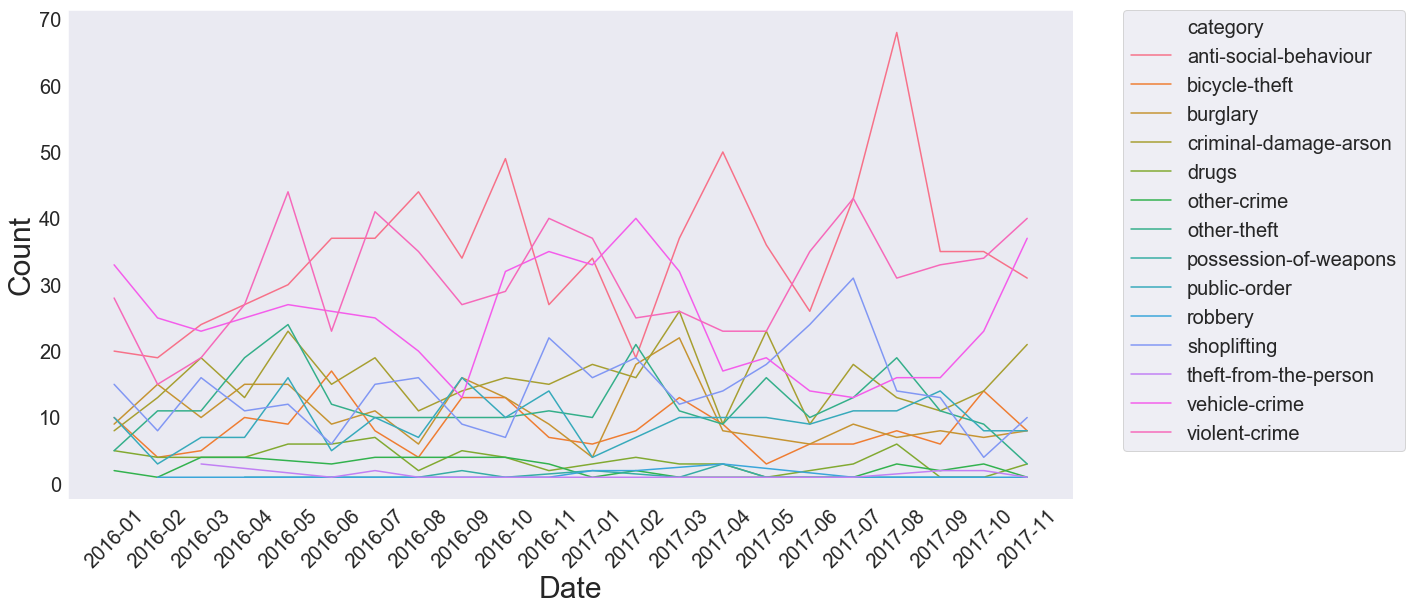

In [9]:
sns.set_style("dark")

sns.lineplot(x="month", y="id_count", hue="category",data=df2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 20})
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize=30)
plt.xlabel('Date', fontsize=30)

Text(0.5,0,'Date')

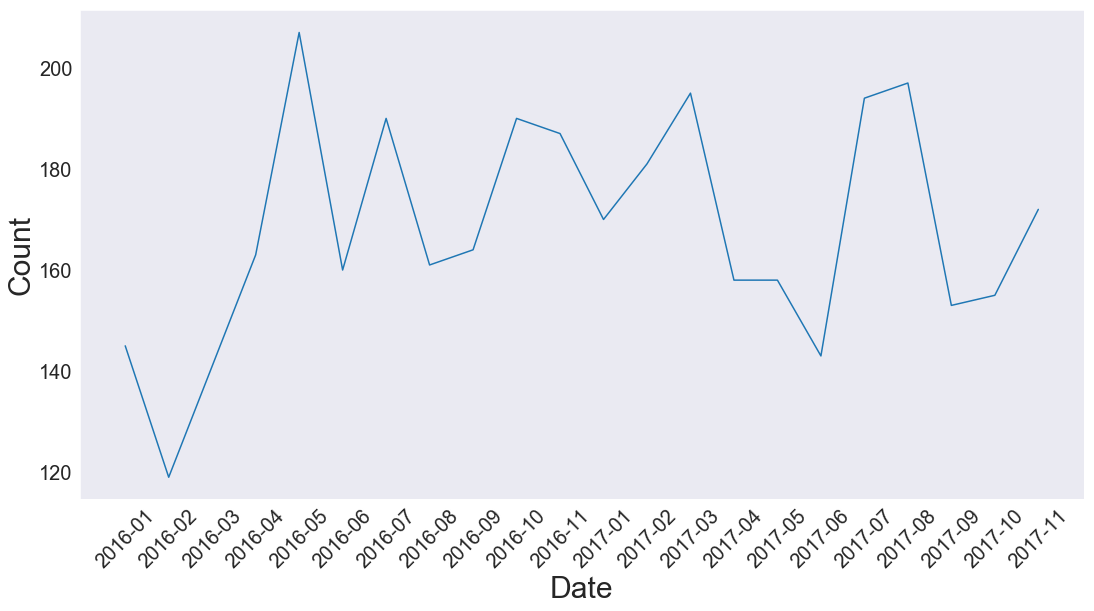

In [10]:
sns.lineplot(x="month", y="id_count",data=df3)
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize=30)
plt.xlabel('Date', fontsize=30)

AttributeError: 'AxesSubplot' object has no attribute 'ylabel'

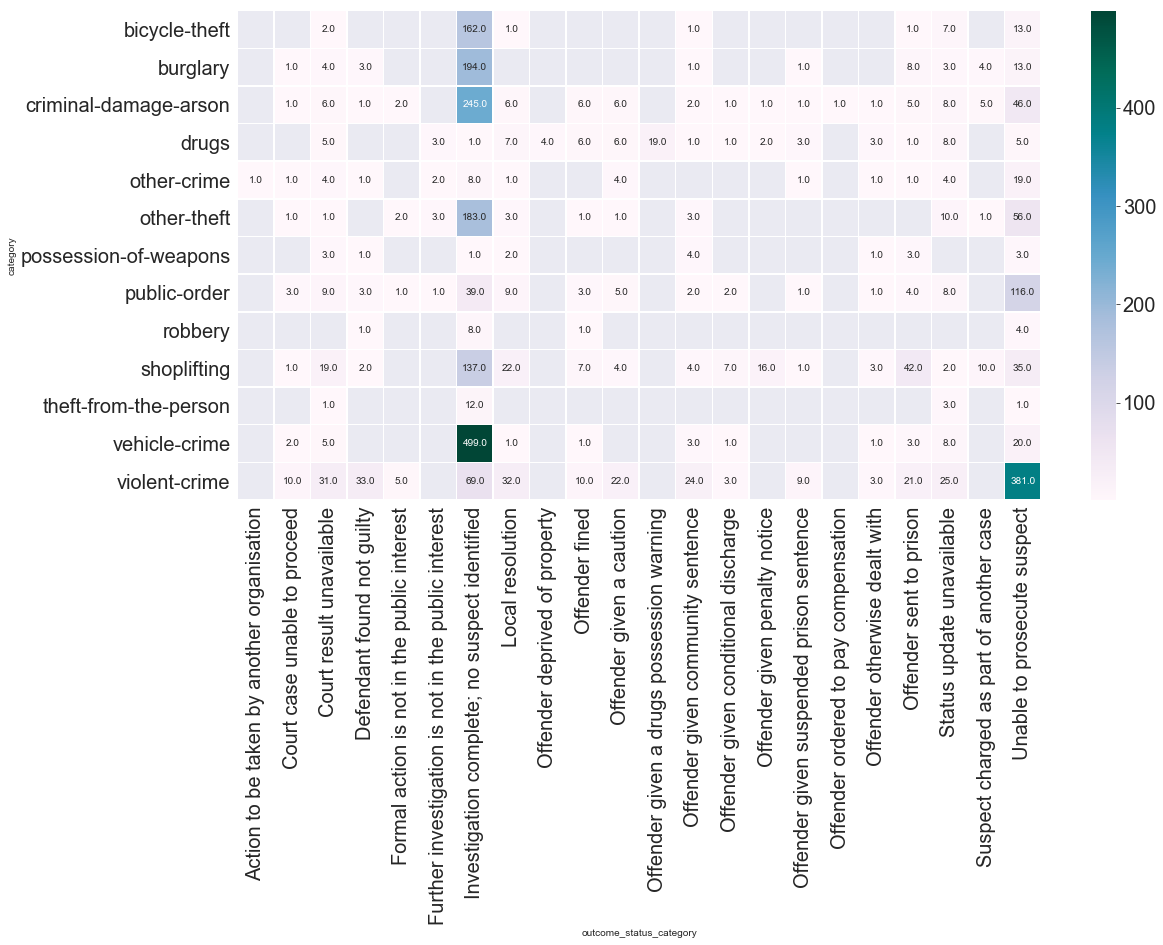

In [12]:
df4 = df[['category','month','outcome_status','outcome_status.category','id']].groupby(['category','outcome_status.category'], as_index=False).agg(['mean', 'count'])
df4 = df4.reset_index()
df4.columns = df4.columns.droplevel(0)
df4.columns = ['category', 'outcome_status_category', 'outcome_status_mean', 'outcome_status_count', 'id_mean', 'id_count']
cat_compare = df4.pivot('category', 'outcome_status_category', 'id_count')
g= sns.heatmap(cat_compare,linewidths=.5, cmap="PuBuGn", annot=True, fmt='.1f')
g.ylabel('Category', fontsize=30)
g.xlabel('Action Category', fontsize=30)
